In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('logs/psac_15-r1.txt') as f:
    log_15 = [line.rstrip()[1:] for line in f]
    
with open('logs/psac_20-r1.txt') as f:
    log_20 = [line.rstrip()[1:] for line in f]
    
    
with open('logs/psac_25-r1.txt') as f:
    log_25 = [line.rstrip()[1:] for line in f]
    

In [3]:
def formatData(data):
    
    epoch = 1
    instances = []
    instance = None
    
    for i in data:
        thing, val = i.split(': ')
        val = float(val)
        
        if thing == 'train_loss':
            if instance is not None:
                instances.append(instance)
            # set up next epoch thing
            instance = {'epoch': epoch}
            epoch += 1
            
        instance[thing] = val
        
    df = pd.DataFrame(instances)
    return instances, df
        
            
        
lst, df = formatData(log_15)

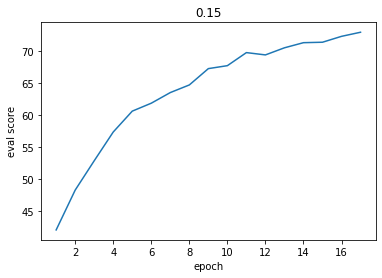

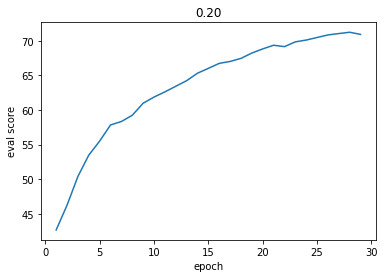

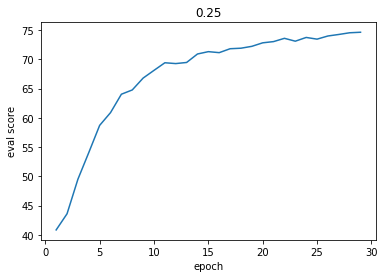

<Figure size 432x288 with 0 Axes>

In [4]:
for log, name in zip([log_15, log_20, log_25], ['0.15', '0.20', '0.25']):
    lst, df = formatData(log)
    sns.lineplot(data=df, x='epoch', y='eval score')
    plt.title(name)
    plt.show()
    plt.clf()

In [6]:
lst[0]

{'epoch': 1,
 'train_loss': 1.67,
 'costing time': 5694.19,
 'eval score': 40.83,
 'current best eval score': 40.83}